In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for encoding
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix#for checking testing results
from sklearn.tree import plot_tree

In [2]:
company = pd.read_csv("E:/Userfiles/Download/Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company=pd.get_dummies(company,columns=['ShelveLoc','Urban','US'], drop_first=True)
company

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


In [4]:
company["sales_list"] = pd.cut(company["Sales"], bins = [-5,7,25], labels = ["Risky", "Good",])
company

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,sales_list
0,9.50,138,73,11,276,120,42,17,0,0,1,1,Good
1,11.22,111,48,16,260,83,65,10,1,0,1,1,Good
2,10.06,113,35,10,269,80,59,12,0,1,1,1,Good
3,7.40,117,100,4,466,97,55,14,0,1,1,1,Good
4,4.15,141,64,3,340,128,38,13,0,0,1,0,Risky
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1,Good
396,6.14,139,23,3,37,120,55,11,0,1,0,1,Risky
397,7.41,162,26,12,368,159,40,18,0,1,1,1,Good
398,5.94,100,79,7,284,95,50,12,0,0,1,1,Risky


In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
company['sales_list']= label_encoder.fit_transform(company['sales_list'])
company

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,sales_list
0,9.50,138,73,11,276,120,42,17,0,0,1,1,0
1,11.22,111,48,16,260,83,65,10,1,0,1,1,0
2,10.06,113,35,10,269,80,59,12,0,1,1,1,0
3,7.40,117,100,4,466,97,55,14,0,1,1,1,0
4,4.15,141,64,3,340,128,38,13,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1,0
396,6.14,139,23,3,37,120,55,11,0,1,0,1,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1,0
398,5.94,100,79,7,284,95,50,12,0,0,1,1,1


In [6]:
x=company.iloc[:,1:12]
y=company['sales_list']

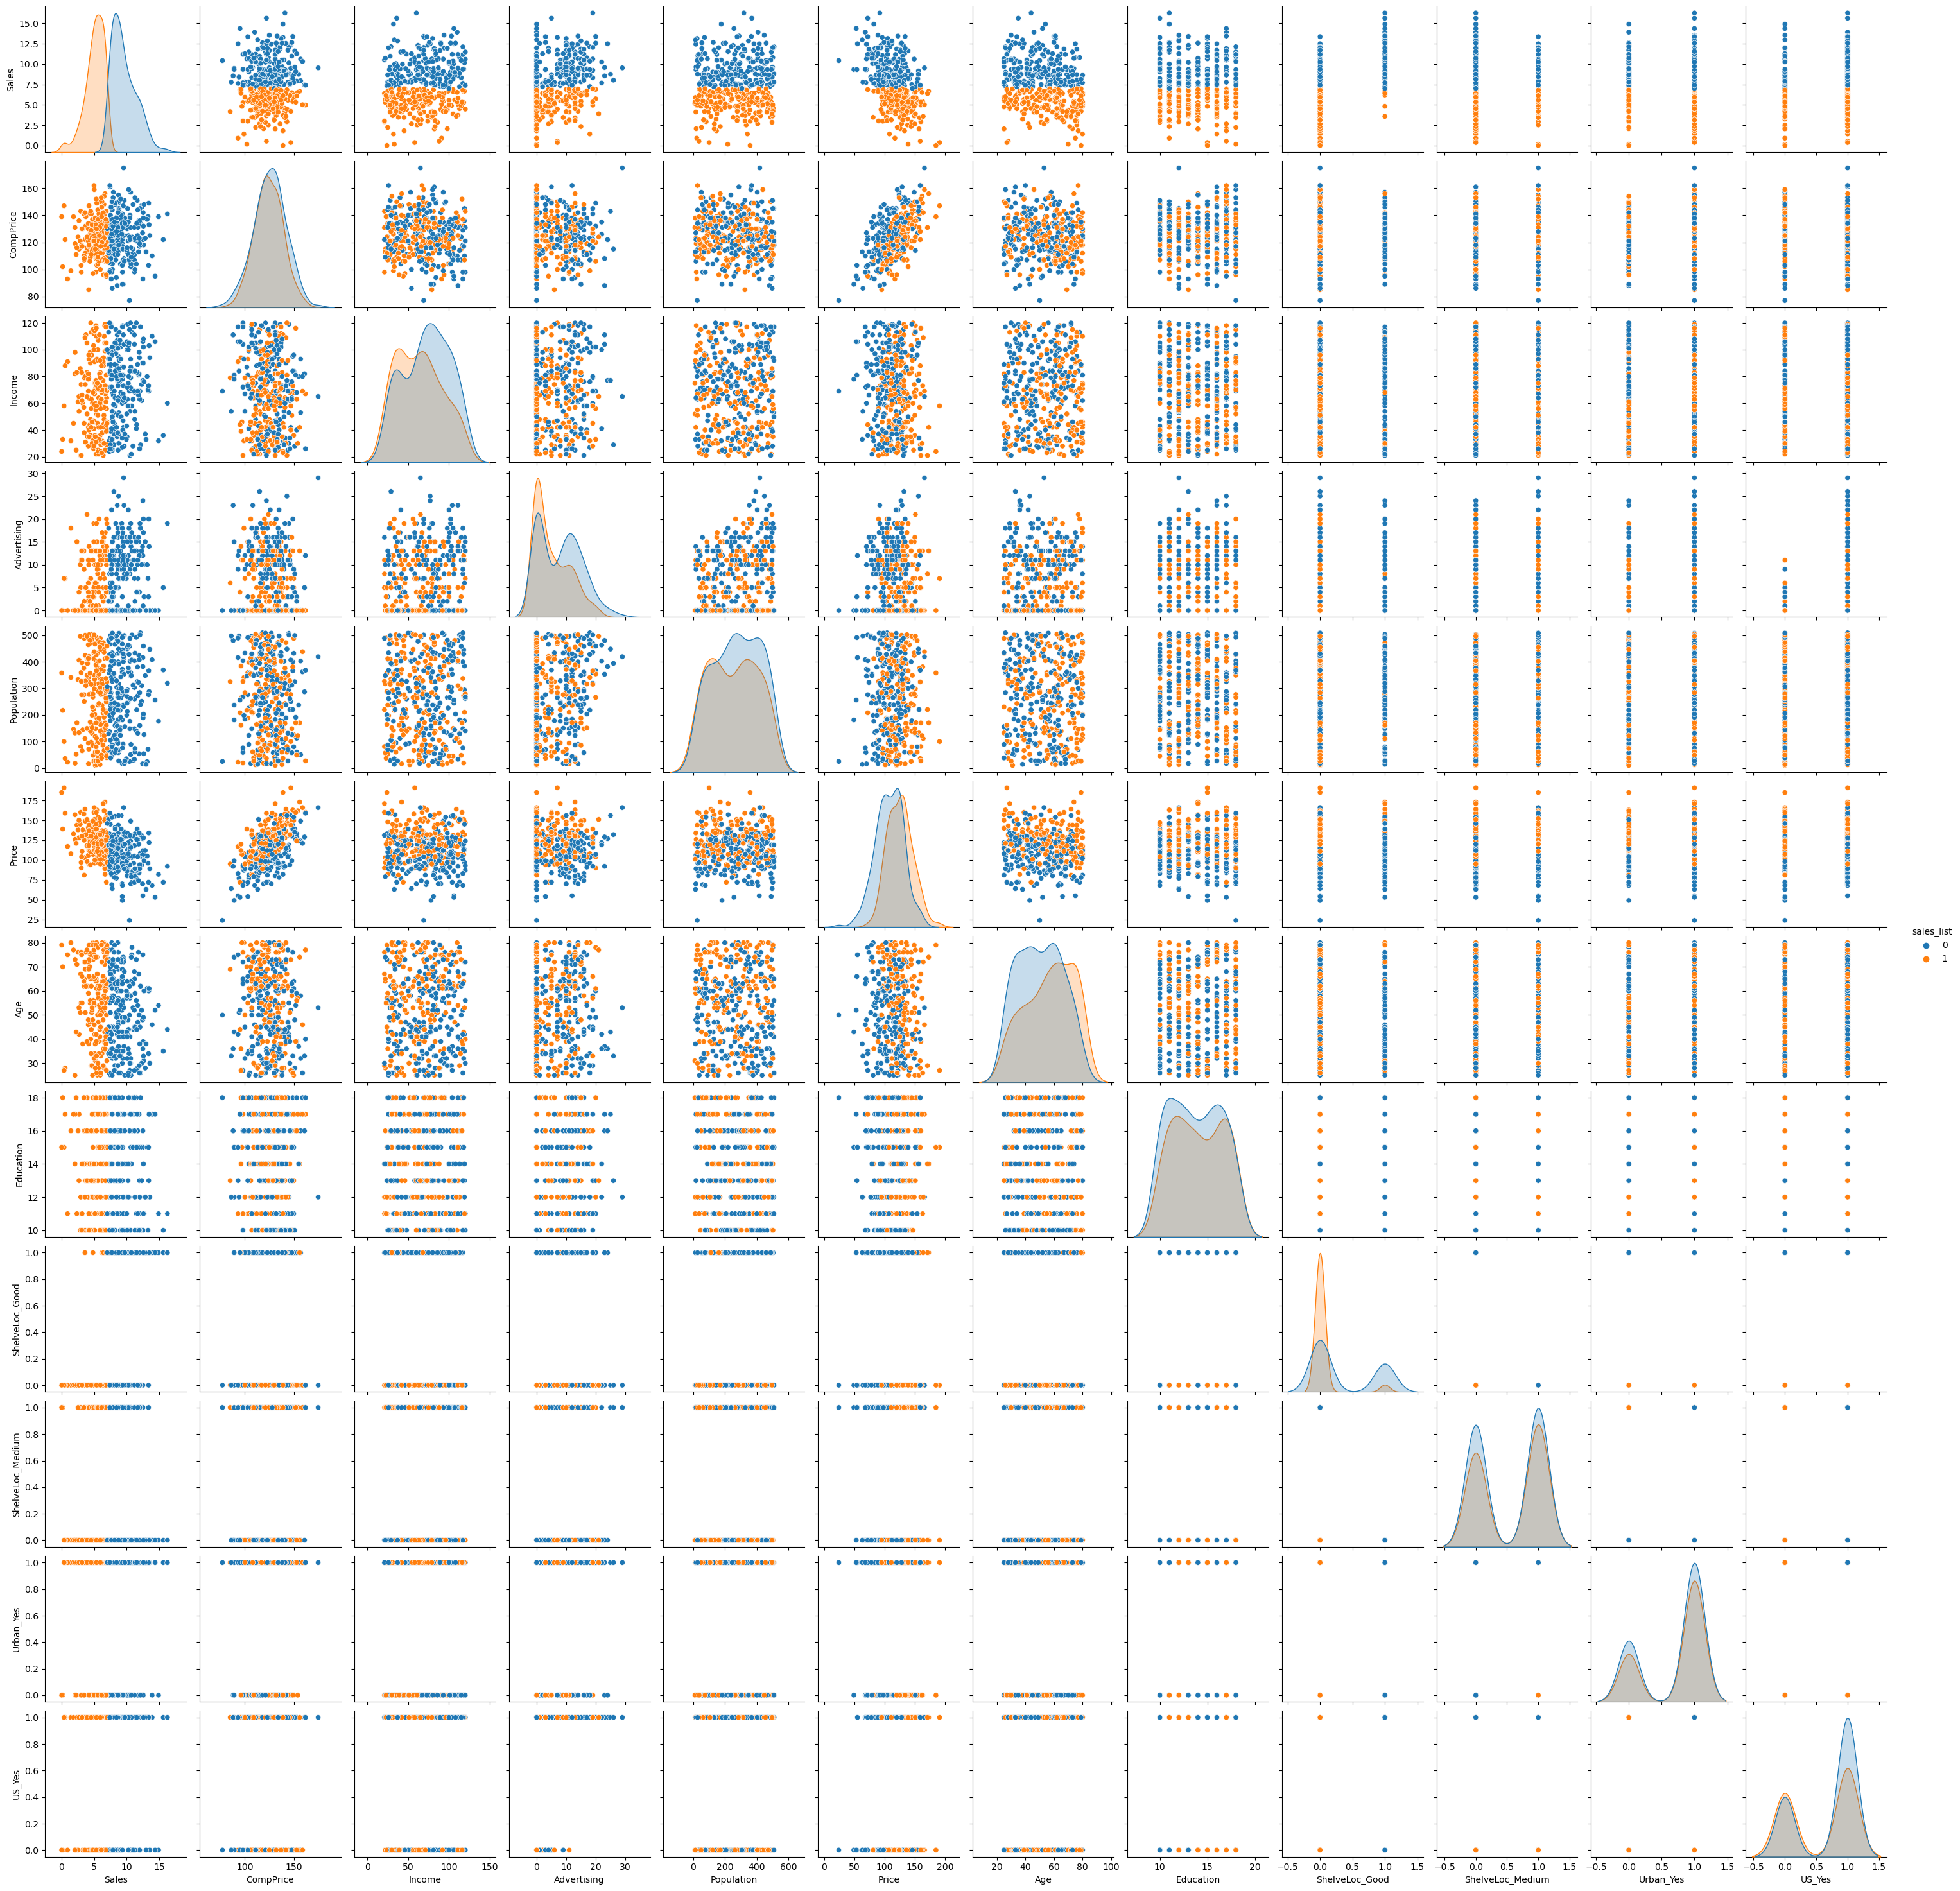

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data= company, hue = 'sales_list')

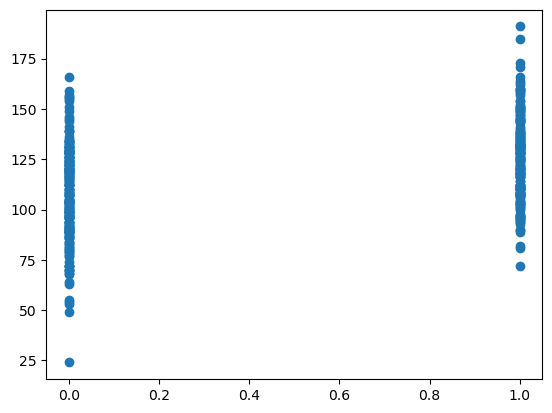

In [8]:
plt.scatter(company['sales_list'], company['Price'])
plt.show()

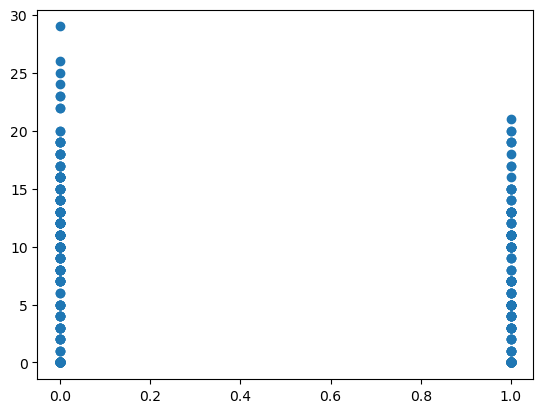

In [9]:
plt.scatter(company['sales_list'], company['Advertising'])
plt.show()

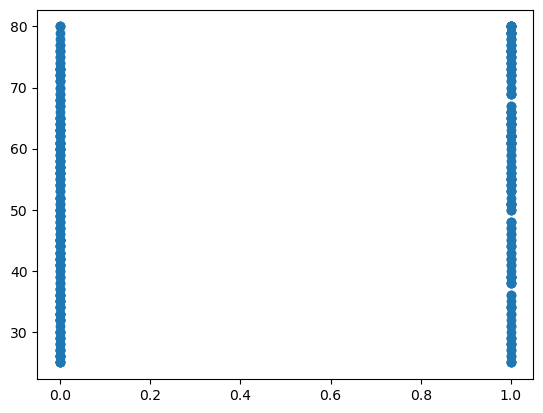

In [10]:
plt.scatter(company['sales_list'], company['Age'])
plt.show()

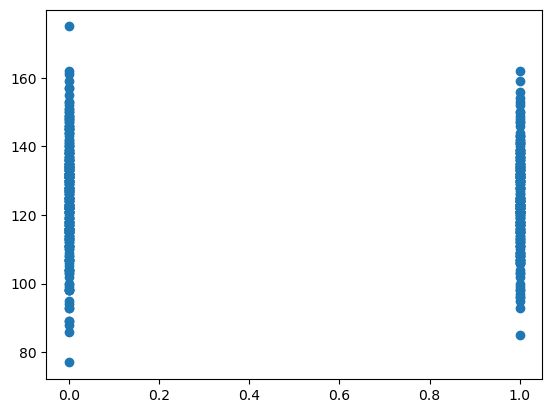

In [11]:
plt.scatter(company['sales_list'], company['CompPrice'])
plt.show()

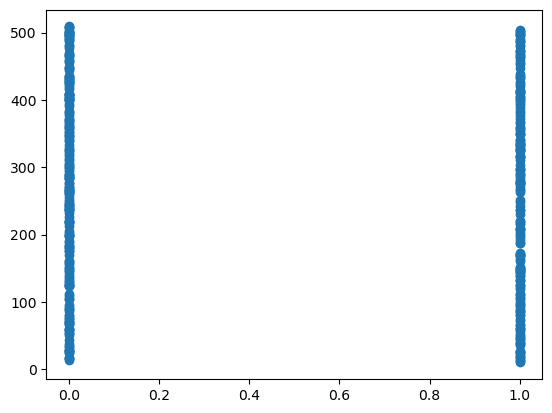

In [12]:
plt.scatter(company['sales_list'], company['Population'])
plt.show()

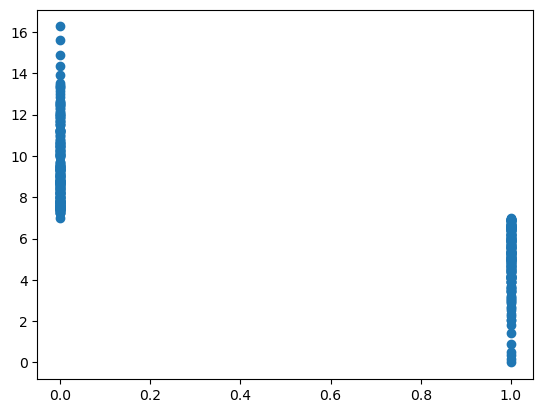

In [13]:
plt.scatter(company['sales_list'], company['Sales'])
plt.show()

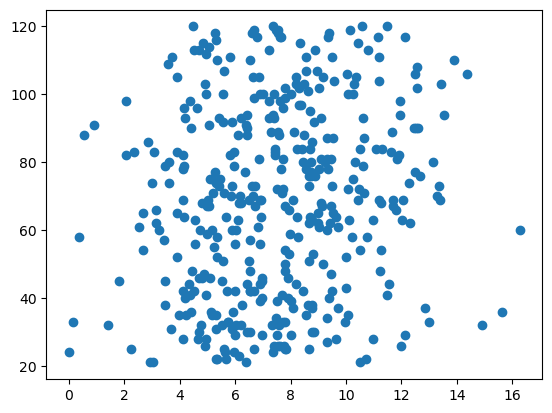

In [14]:
plt.scatter(company['Sales'], company['Income'])
plt.show()

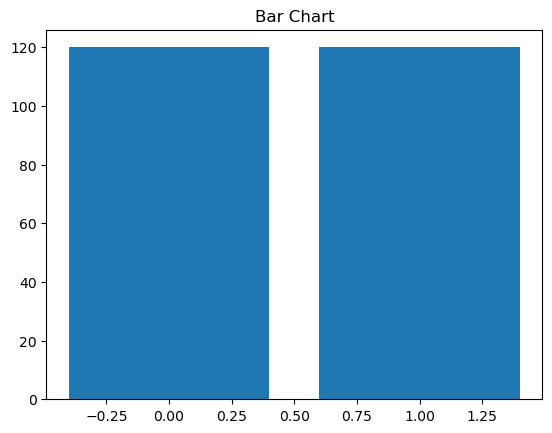

In [15]:
plt.bar(company['sales_list'], company['Income'])
 
plt.title("Bar Chart")
 
plt.show()

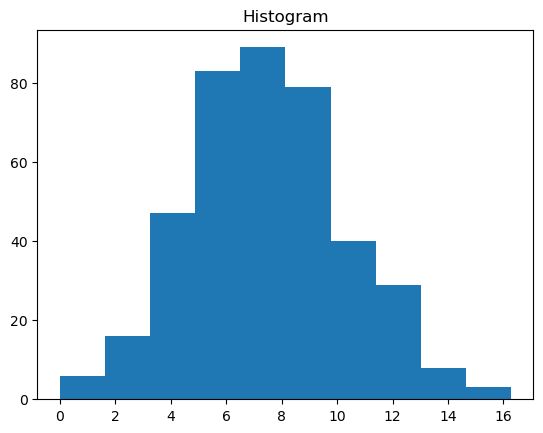

In [16]:
plt.hist(company['Sales'])
 
plt.title("Histogram")
 
plt.show()

In [17]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [18]:
df_norm = norm_func(company.iloc[:,1:12])
df_norm.tail(10)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
390,0.316327,0.545455,0.310345,0.102204,0.520958,0.763636,0.250,0.0,1.0,1.0,1.0
391,0.775510,0.424242,0.000000,0.078156,0.598802,0.563636,0.750,0.0,0.0,1.0,0.0
392,0.530612,0.212121,0.448276,0.611222,0.634731,0.163636,0.375,0.0,0.0,1.0,1.0
393,0.326531,0.303030,0.344828,0.032064,0.574850,0.090909,0.875,0.0,1.0,0.0,1.0
394,0.540816,0.373737,0.655172,0.713427,0.688623,0.145455,0.750,0.0,0.0,1.0,1.0
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.145455,0.500,1.0,0.0,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.545455,0.125,0.0,1.0,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.272727,1.000,0.0,1.0,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.454545,0.250,0.0,0.0,1.0,1.0
399,0.581633,0.161616,0.000000,0.034068,0.574850,0.436364,0.750,1.0,0.0,1.0,1.0


In [12]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [13]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [14]:
from sklearn import tree

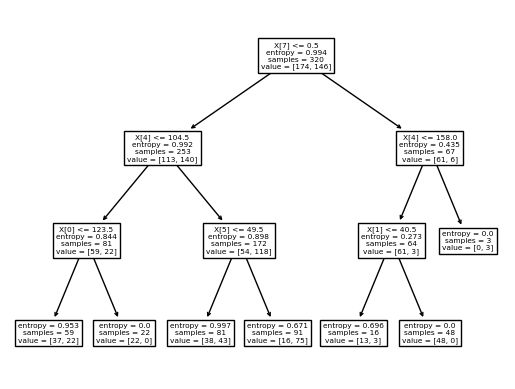

In [15]:
tree.plot_tree(model);

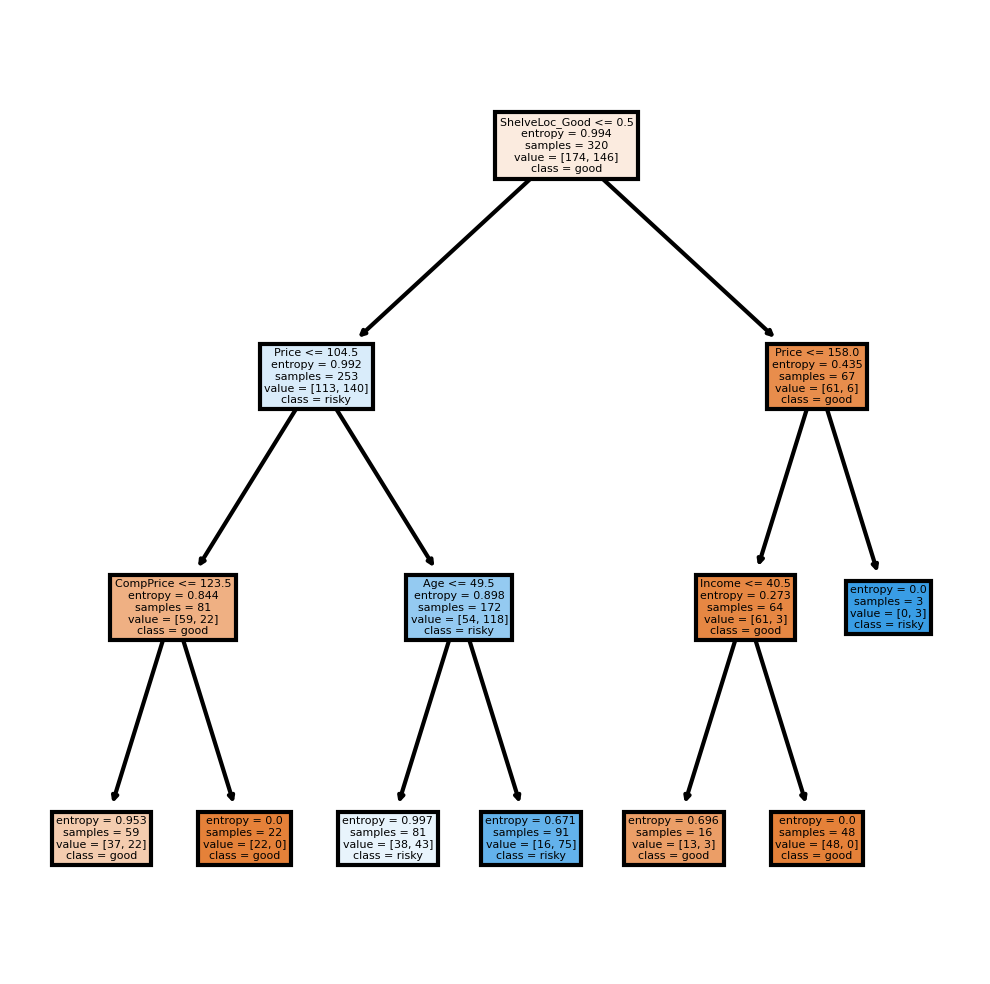

In [16]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Good','ShelveLoc_Medium','Urban_Yes','US_Yes']
cn=['good','risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [17]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

0    41
1    39
dtype: int64

In [18]:
preds

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [19]:
pd.crosstab(y_test,preds)

col_0,0,1
sales_list,,
0,31,11
1,10,28


In [20]:
np.mean(preds==y_test)

0.7375

# Using CART (Gini)

In [21]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [22]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7375